# Imports

In [1]:
import pandas as pd
import numpy as np
from nptdms import TdmsFile
import matplotlib.pyplot as plt
np.set_printoptions(precision=10)

In [2]:
def format_filename(i, filename):
    if i == 0:
        return f"{filename}.tdms"
    else:
        # Use f-strings to format the number with leading zeros
        formatted_number = f"{i:04d}"
        return f"{filename}_{formatted_number}.tdms"

In [3]:
def process_data(path, filename, num_files):
    #need path to be like ./Lot2 Brd1/
    all_data = pd.DataFrame();
    last_time = 0
    next_last_time = 0
    for i in range(0, num_files):
        tdms_file = TdmsFile.read(path + format_filename(i, filename))
        channel_data_timestamps = {}
    
        for group in tdms_file.groups():
            for channel in group.channels():
                channel_data_timestamps[channel.name] = channel.data
                channel_data_timestamps[f"{channel.name}_timestamps"] = channel.time_track() + last_time
        first_group = next(iter(tdms_file.groups()))
        first_channel = next(iter(first_group.channels()))
        
        df = pd.DataFrame(channel_data_timestamps);
        last_time = df.iloc[-1][f"{first_channel.name}_timestamps"];
    
        all_data = pd.concat([all_data, df], ignore_index=True)

    return all_data
    
    

In [4]:
def plot_data(run_data, title):
    plt.figure(figsize = (20,10))
    for i in range(0, run_data.shape[1], 2):
        x_col = run_data.columns[i+1]
        y_col = run_data.columns[i]
        plt.plot(run_data[x_col], run_data[y_col], label= y_col)
    plt.legend(loc="upper right")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.show()

# Lot 2 Board 1

In [12]:
data = process_data("./Dry Run/Lot2 Brd1/", "dry_run", 5)

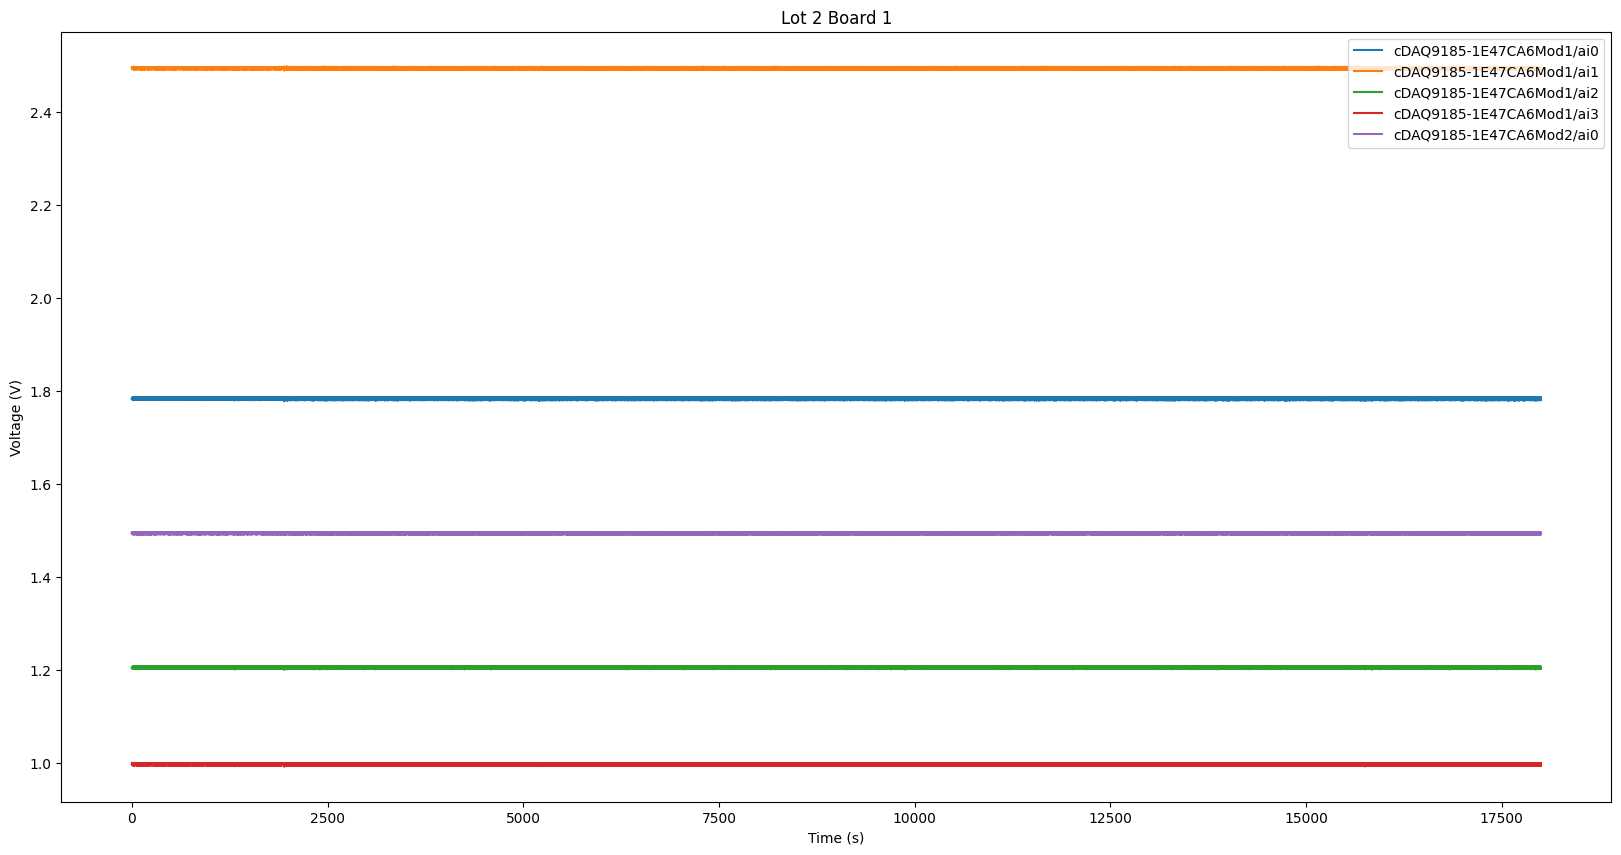

In [6]:
plot_data(data, "Lot 2 Board 1")

In [7]:
np.mean(data, axis = 0)

cDAQ9185-1E47CA6Mod1/ai0                  1.783571
cDAQ9185-1E47CA6Mod1/ai0_timestamps    8999.999750
cDAQ9185-1E47CA6Mod1/ai1                  2.494155
cDAQ9185-1E47CA6Mod1/ai1_timestamps    8999.999750
cDAQ9185-1E47CA6Mod1/ai2                  1.205857
cDAQ9185-1E47CA6Mod1/ai2_timestamps    8999.999750
cDAQ9185-1E47CA6Mod1/ai3                  0.997959
cDAQ9185-1E47CA6Mod1/ai3_timestamps    8999.999750
cDAQ9185-1E47CA6Mod2/ai0                  1.494117
cDAQ9185-1E47CA6Mod2/ai0_timestamps    8999.999750
dtype: float64

In [19]:
res = np.std(data, axis = 0)

In [20]:
res

cDAQ9185-1E47CA6Mod1/ai0                  0.000347
cDAQ9185-1E47CA6Mod1/ai0_timestamps    5196.152284
cDAQ9185-1E47CA6Mod1/ai1                  0.000357
cDAQ9185-1E47CA6Mod1/ai1_timestamps    5196.152284
cDAQ9185-1E47CA6Mod1/ai2                  0.000296
cDAQ9185-1E47CA6Mod1/ai2_timestamps    5196.152284
cDAQ9185-1E47CA6Mod1/ai3                  0.000289
cDAQ9185-1E47CA6Mod1/ai3_timestamps    5196.152284
cDAQ9185-1E47CA6Mod2/ai0                  0.000353
cDAQ9185-1E47CA6Mod2/ai0_timestamps    5196.152284
dtype: float64

# Lot 2 Board 4

In [5]:
all_Data = process_data("./Dry Run/Lot2 Brd4/", "dry_run", 24)

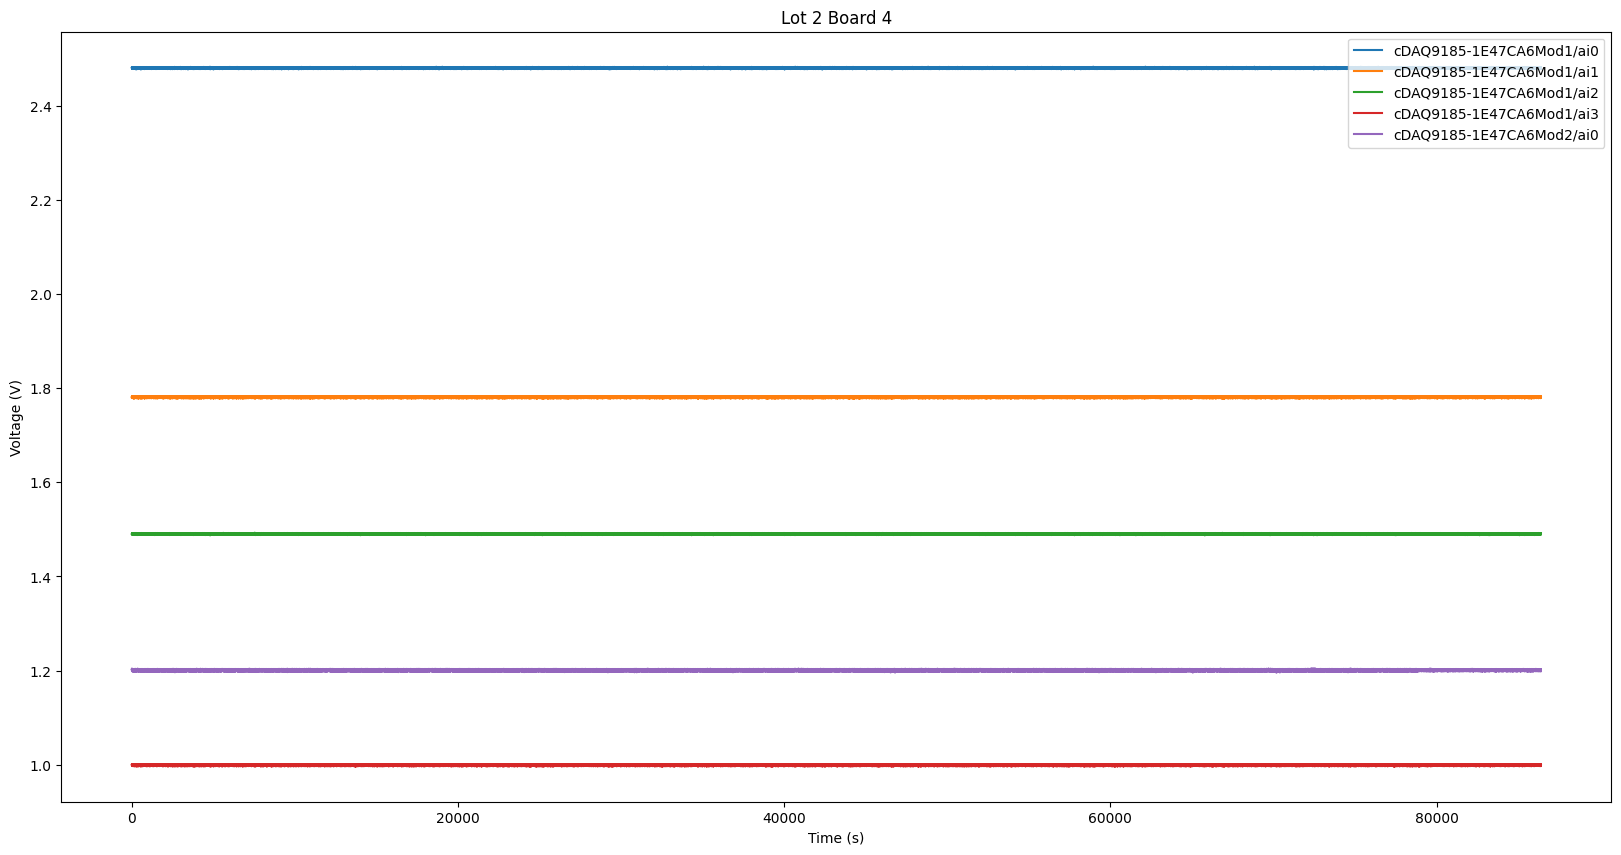

In [31]:
plot_data(all_Data, "Lot 2 Board 4")

In [6]:
all_Data

,cDAQ9185-1E47CA6Mod1/ai0,cDAQ9185-1E47CA6Mod1/ai0_timestamps,cDAQ9185-1E47CA6Mod1/ai1,cDAQ9185-1E47CA6Mod1/ai1_timestamps,cDAQ9185-1E47CA6Mod1/ai2,cDAQ9185-1E47CA6Mod1/ai2_timestamps,cDAQ9185-1E47CA6Mod1/ai3,cDAQ9185-1E47CA6Mod1/ai3_timestamps,cDAQ9185-1E47CA6Mod2/ai0,cDAQ9185-1E47CA6Mod2/ai0_timestamps
0,2.480837,0.000,1.780690,0.000,1.490437,0.000,0.999778,0.000,1.201423,0.000
1,2.480518,0.001,1.780690,0.001,1.490756,0.001,0.999462,0.001,1.201104,0.001
2,2.479881,0.002,1.781322,0.002,1.490756,0.002,0.999146,0.002,1.202699,0.002
3,2.480200,0.003,1.781322,0.003,1.490437,0.003,0.999146,0.003,1.201104,0.003
4,2.479881,0.004,1.781006,0.004,1.490756,0.004,0.999462,0.004,1.201742,0.004
...,...,...,...,...,...,...,...,...,...,...
86399995,2.480518,86399.972,1.781006,86399.972,1.490756,86399.972,0.999778,86399.972,1.201423,86399.972
86399996,2.480518,86399.973,1.781006,86399.973,1.491075,86399.973,0.998831,86399.973,1.202061,86399.973
86399997,2.479881,86399.974,1.781638,86399.974,1.491075,86399.974,0.998831,86399.974,1.202380,86399.974
86399998,2.479881,86399.975,1.780374,86399.975,1.490437,86399.975,1.000094,86399.975,1.201423,86399.975


In [9]:
np.mean(all_Data, axis = 0)

cDAQ9185-1E47CA6Mod1/ai0                   2.480262
cDAQ9185-1E47CA6Mod1/ai0_timestamps    43199.988000
cDAQ9185-1E47CA6Mod1/ai1                   1.780934
cDAQ9185-1E47CA6Mod1/ai1_timestamps    43199.988000
cDAQ9185-1E47CA6Mod1/ai2                   1.490770
cDAQ9185-1E47CA6Mod1/ai2_timestamps    43199.988000
cDAQ9185-1E47CA6Mod1/ai3                   0.999276
cDAQ9185-1E47CA6Mod1/ai3_timestamps    43199.988000
cDAQ9185-1E47CA6Mod2/ai0                   1.201383
cDAQ9185-1E47CA6Mod2/ai0_timestamps    43199.988000
dtype: float64

In [ ]:
np.mean(all_Data, axis = 0)

In [12]:
np.std(all_Data, axis = 0)

cDAQ9185-1E47CA6Mod1/ai0                   0.000401
cDAQ9185-1E47CA6Mod1/ai0_timestamps    24941.524713
cDAQ9185-1E47CA6Mod1/ai1                   0.000375
cDAQ9185-1E47CA6Mod1/ai1_timestamps    24941.524713
cDAQ9185-1E47CA6Mod1/ai2                   0.000297
cDAQ9185-1E47CA6Mod1/ai2_timestamps    24941.524713
cDAQ9185-1E47CA6Mod1/ai3                   0.000293
cDAQ9185-1E47CA6Mod1/ai3_timestamps    24941.524713
cDAQ9185-1E47CA6Mod2/ai0                   0.000347
cDAQ9185-1E47CA6Mod2/ai0_timestamps    24941.524713
dtype: float64

In [14]:
all_Data.describe()

,cDAQ9185-1E47CA6Mod1/ai0,cDAQ9185-1E47CA6Mod1/ai0_timestamps,cDAQ9185-1E47CA6Mod1/ai1,cDAQ9185-1E47CA6Mod1/ai1_timestamps,cDAQ9185-1E47CA6Mod1/ai2,cDAQ9185-1E47CA6Mod1/ai2_timestamps,cDAQ9185-1E47CA6Mod1/ai3,cDAQ9185-1E47CA6Mod1/ai3_timestamps,cDAQ9185-1E47CA6Mod2/ai0,cDAQ9185-1E47CA6Mod2/ai0_timestamps
count,8.640000e+07,8.640000e+07,8.640000e+07,8.640000e+07,8.640000e+07,8.640000e+07,8.640000e+07,8.640000e+07,8.640000e+07,8.640000e+07
mean,2.480262e+00,4.319999e+04,1.780934e+00,4.319999e+04,1.490770e+00,4.319999e+04,9.992759e-01,4.319999e+04,1.201383e+00,4.319999e+04
std,4.008413e-04,2.494152e+04,3.751831e-04,2.494152e+04,2.972904e-04,2.494152e+04,2.925701e-04,2.494152e+04,3.472147e-04,2.494152e+04
min,2.477332e+00,0.000000e+00,1.777530e+00,0.000000e+00,1.487250e+00,0.000000e+00,9.956707e-01,0.000000e+00,1.195365e+00,0.000000e+00
25%,2.479881e+00,2.159999e+04,1.780690e+00,2.159999e+04,1.490437e+00,2.159999e+04,9.991465e-01,2.159999e+04,1.201104e+00,2.159999e+04
50%,2.480200e+00,4.319999e+04,1.781006e+00,4.319999e+04,1.490756e+00,4.319999e+04,9.991465e-01,4.319999e+04,1.201423e+00,4.319999e+04
75%,2.480518e+00,6.479998e+04,1.781322e+00,6.479998e+04,1.491075e+00,6.479998e+04,9.994625e-01,6.479998e+04,1.201423e+00,6.479998e+04
max,2.483068e+00,8.639998e+04,1.783218e+00,8.639998e+04,1.492987e+00,8.639998e+04,1.001042e+00,8.639998e+04,1.204293e+00,8.639998e+04


In [11]:
from nptdms import TdmsFile
import pandas as pd

# Open the TDMS file
tdms_file = TdmsFile.read("./Dry Run/Lot2 Brd1/dry_run.tdms")

# Create an empty dictionary to store data from each channel
channel_data = {}
channel_data_timestamps = {}

# Iterate through the groups and channels
for group in tdms_file.groups():
    for channel in group.channels():
        channel_data[channel.name] = channel.data
        channel_data_timestamps[channel.name] = channel.data
        channel_data_timestamps[f"{channel.name}_timestamps"] = channel.time_track()


# Combine the data into a pandas DataFrame
df = pd.DataFrame(channel_data)

# You can also add timestamps to the DataFrame if needed
# For example, assuming that all channels have the same timestamps
#timestamps = tdms_file["Group1"]["Channel1"].time_track()
#df['Timestamp'] = timestamps

# You can now work with the data in the pandas DataFrame
df

,cDAQ9185-1E47CA6Mod1/ai0,cDAQ9185-1E47CA6Mod1/ai1,cDAQ9185-1E47CA6Mod1/ai2,cDAQ9185-1E47CA6Mod1/ai3,cDAQ9185-1E47CA6Mod2/ai0
0,1.782653,2.495498,1.203902,1.000410,1.494448
1,1.783609,2.494550,1.205814,0.997883,1.494129
2,1.783927,2.493918,1.206133,0.997883,1.494129
3,1.783609,2.494550,1.205495,0.997883,1.493492
4,1.783609,2.494866,1.205814,0.998515,1.493492
...,...,...,...,...,...
35999995,1.783609,2.493918,1.205814,0.997883,1.494448
35999996,1.783927,2.494550,1.205814,0.998831,1.494767
35999997,1.783609,2.494234,1.205814,0.997567,1.494129
35999998,1.783609,2.493918,1.205495,0.998199,1.494129


# Lot 1 Board 2 & 5

In [18]:
all_Data = process_data("./Dry Run/Lot1 Brd2&5/", "dry_run", 1)

In [8]:
np.mean(all_Data, axis = 0)

cDAQ9185-1E47CA6Mod1/ai0                  1.784789
cDAQ9185-1E47CA6Mod1/ai0_timestamps    1799.999950
cDAQ9185-1E47CA6Mod1/ai1                  2.486658
cDAQ9185-1E47CA6Mod1/ai1_timestamps    1799.999950
cDAQ9185-1E47CA6Mod1/ai2                  1.199520
cDAQ9185-1E47CA6Mod1/ai2_timestamps    1799.999950
cDAQ9185-1E47CA6Mod1/ai3                  0.997604
cDAQ9185-1E47CA6Mod1/ai3_timestamps    1799.999950
cDAQ9185-1E47CA6Mod2/ai0                  1.497744
cDAQ9185-1E47CA6Mod2/ai0_timestamps    1799.999950
cDAQ9185-1E47CA6Mod2/ai1                  1.781347
cDAQ9185-1E47CA6Mod2/ai1_timestamps    1799.999950
cDAQ9185-1E47CA6Mod2/ai2                  2.481900
cDAQ9185-1E47CA6Mod2/ai2_timestamps    1799.999950
cDAQ9185-1E47CA6Mod2/ai3                  1.197322
cDAQ9185-1E47CA6Mod2/ai3_timestamps    1799.999950
cDAQ9185-1E47CA6Mod3/ai0                  1.001037
cDAQ9185-1E47CA6Mod3/ai0_timestamps    1799.999950
cDAQ9185-1E47CA6Mod3/ai1                  1.494706
cDAQ9185-1E47CA6Mod3/ai1_timest

In [19]:
np.std(all_Data, axis = 0)

cDAQ9185-1E47CA6Mod1/ai0                  0.000348
cDAQ9185-1E47CA6Mod1/ai0_timestamps    1039.230485
cDAQ9185-1E47CA6Mod1/ai1                  0.000353
cDAQ9185-1E47CA6Mod1/ai1_timestamps    1039.230485
cDAQ9185-1E47CA6Mod1/ai2                  0.000307
cDAQ9185-1E47CA6Mod1/ai2_timestamps    1039.230485
cDAQ9185-1E47CA6Mod1/ai3                  0.000298
cDAQ9185-1E47CA6Mod1/ai3_timestamps    1039.230485
cDAQ9185-1E47CA6Mod2/ai0                  0.000345
cDAQ9185-1E47CA6Mod2/ai0_timestamps    1039.230485
cDAQ9185-1E47CA6Mod2/ai1                  0.000326
cDAQ9185-1E47CA6Mod2/ai1_timestamps    1039.230485
cDAQ9185-1E47CA6Mod2/ai2                  0.000292
cDAQ9185-1E47CA6Mod2/ai2_timestamps    1039.230485
cDAQ9185-1E47CA6Mod2/ai3                  0.000322
cDAQ9185-1E47CA6Mod2/ai3_timestamps    1039.230485
cDAQ9185-1E47CA6Mod3/ai0                  0.000303
cDAQ9185-1E47CA6Mod3/ai0_timestamps    1039.230485
cDAQ9185-1E47CA6Mod3/ai1                  0.000259
cDAQ9185-1E47CA6Mod3/ai1_timest

# Lot 1 Board 1 & 3

In [12]:
all_Data = process_data("./Dry Run/Lot1 Brd 1&3/", "dry_run", 2)

In [14]:
all_Data[100000:]

7200000

In [16]:
np.mean(all_Data[3600000:], axis = 0)

cDAQ9185-21A7058Mod1/ai0                  1.783920
cDAQ9185-21A7058Mod1/ai0_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai1                  2.481616
cDAQ9185-21A7058Mod1/ai1_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai2                  1.201100
cDAQ9185-21A7058Mod1/ai2_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai3                  1.000345
cDAQ9185-21A7058Mod1/ai3_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai0                  1.494952
cDAQ9185-21A7058Mod2/ai0_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai1                  1.782429
cDAQ9185-21A7058Mod2/ai1_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai2                  2.479942
cDAQ9185-21A7058Mod2/ai2_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai3                  1.196888
cDAQ9185-21A7058Mod2/ai3_timestamps    5399.998500
cDAQ9185-21A7058Mod3/ai0                  0.999657
cDAQ9185-21A7058Mod3/ai0_timestamps    5399.998500
cDAQ9185-21A7058Mod3/ai1                  1.494659
cDAQ9185-21A7058Mod3/ai1_timest

In [17]:
np.std(all_Data[3600000:], axis = 0)

cDAQ9185-21A7058Mod1/ai0                  0.000341
cDAQ9185-21A7058Mod1/ai0_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai1                  0.000341
cDAQ9185-21A7058Mod1/ai1_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai2                  0.000284
cDAQ9185-21A7058Mod1/ai2_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai3                  0.000285
cDAQ9185-21A7058Mod1/ai3_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai0                  0.000461
cDAQ9185-21A7058Mod2/ai0_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai1                  0.000329
cDAQ9185-21A7058Mod2/ai1_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai2                  0.000293
cDAQ9185-21A7058Mod2/ai2_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai3                  0.000323
cDAQ9185-21A7058Mod2/ai3_timestamps    1039.230485
cDAQ9185-21A7058Mod3/ai0                  0.000507
cDAQ9185-21A7058Mod3/ai0_timestamps    1039.230485
cDAQ9185-21A7058Mod3/ai1                  0.000476
cDAQ9185-21A7058Mod3/ai1_timest

# Lot 2 Board 2&3

In [22]:
all_Data = process_data("./Dry Run/Lot2 Brd2&3/", "dry_run", 2)

In [23]:
np.mean(all_Data[3600000:], axis = 0)

cDAQ9185-21A7058Mod1/ai0                  1.782463
cDAQ9185-21A7058Mod1/ai0_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai1                  2.473039
cDAQ9185-21A7058Mod1/ai1_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai2                  1.200399
cDAQ9185-21A7058Mod1/ai2_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai3                  0.998685
cDAQ9185-21A7058Mod1/ai3_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai0                  1.492162
cDAQ9185-21A7058Mod2/ai0_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai1                  1.783849
cDAQ9185-21A7058Mod2/ai1_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai2                  2.476944
cDAQ9185-21A7058Mod2/ai2_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai3                  1.202703
cDAQ9185-21A7058Mod2/ai3_timestamps    5399.998500
cDAQ9185-21A7058Mod3/ai0                  0.998656
cDAQ9185-21A7058Mod3/ai0_timestamps    5399.998500
cDAQ9185-21A7058Mod3/ai1                  1.492224
cDAQ9185-21A7058Mod3/ai1_timest

In [24]:
np.std(all_Data[3600000:], axis = 0)

cDAQ9185-21A7058Mod1/ai0                  0.000305
cDAQ9185-21A7058Mod1/ai0_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai1                  0.000330
cDAQ9185-21A7058Mod1/ai1_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai2                  0.000269
cDAQ9185-21A7058Mod1/ai2_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai3                  0.000309
cDAQ9185-21A7058Mod1/ai3_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai0                  0.000513
cDAQ9185-21A7058Mod2/ai0_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai1                  0.000338
cDAQ9185-21A7058Mod2/ai1_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai2                  0.000295
cDAQ9185-21A7058Mod2/ai2_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai3                  0.000341
cDAQ9185-21A7058Mod2/ai3_timestamps    1039.230485
cDAQ9185-21A7058Mod3/ai0                  0.000560
cDAQ9185-21A7058Mod3/ai0_timestamps    1039.230485
cDAQ9185-21A7058Mod3/ai1                  0.000625
cDAQ9185-21A7058Mod3/ai1_timest

# Lot 2 Board 5

In [25]:
all_Data = process_data("./Dry Run/Lot2 Brd5/", "dry_run", 2)

In [26]:
np.mean(all_Data[3600000:], axis = 0)

cDAQ9185-21A7058Mod1/ai0                  1.781118
cDAQ9185-21A7058Mod1/ai0_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai1                  2.479161
cDAQ9185-21A7058Mod1/ai1_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai2                  1.202043
cDAQ9185-21A7058Mod1/ai2_timestamps    5399.998500
cDAQ9185-21A7058Mod1/ai3                  0.998433
cDAQ9185-21A7058Mod1/ai3_timestamps    5399.998500
cDAQ9185-21A7058Mod2/ai0                  1.495035
cDAQ9185-21A7058Mod2/ai0_timestamps    5399.998500
dtype: float64

In [27]:
np.std(all_Data[3600000:], axis = 0)

cDAQ9185-21A7058Mod1/ai0                  0.000326
cDAQ9185-21A7058Mod1/ai0_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai1                  0.000337
cDAQ9185-21A7058Mod1/ai1_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai2                  0.000332
cDAQ9185-21A7058Mod1/ai2_timestamps    1039.230485
cDAQ9185-21A7058Mod1/ai3                  0.000316
cDAQ9185-21A7058Mod1/ai3_timestamps    1039.230485
cDAQ9185-21A7058Mod2/ai0                  0.000320
cDAQ9185-21A7058Mod2/ai0_timestamps    1039.230485
dtype: float64

# Lot 1 Brd 4

In [30]:
all_Data = process_data("./Dry Run/Lot1 Brd4/", "dry_run", 1)

MemoryError: Unable to allocate 2.68 GiB for an array with shape (360000000,) and data type float64

In [ ]:
np.mean(all_Data[3600000:], axis = 0)

In [ ]:
np.std(all_Data[3600000:], axis = 0)